<h1><center><font size="5">Santander Customer Transaction Prediction</font></center></h1>

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTpa_lAFhL32gg5S_6YBMr4r037nZRCtGgwWWjKFfdemIcFOlQ5"         width="500"></img> 

***

# <a>Background</a>

At Santander, mission is to help people and businesses prosper. We are always looking for ways to help our customers understand their financial health and identify which products and services might help them achieve their monetary goals.

**Problem Statement**

In this challenge, we need to identify which customers will make a specific transaction in
the future, irrespective of the amount of money transacted.

## Load Packages

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#changing working directory
os.chdir('E:\\Data Science\\EDWISOR\\Santander CT')

## Loading Data

In [5]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

# <a>Data Exploration</a>

In [6]:
print("dimensions of train data:",train_df.shape)
print("dimensions of test data:",test_df.shape)

dimensions of train data: (200000, 202)
dimensions of test data: (200000, 201)


Both the data sets have 200000 observations with 202 & 201 columns respectively

In [7]:
train_df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [8]:
train_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [9]:
train_df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [10]:
test_df.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


In [12]:
test_df.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


- Standard Deviation in both train and test is quite significant.
- Mean and other measures are close.

## Missing value Analysis

In [13]:
#checking for missing values and data types in train data
value = []
for col in train_df.columns:
    dtype = str(train_df[col].dtype)
    value.append(dtype)
dt= pd.DataFrame(data=train_df.isnull().sum(),columns=['Missing'])
dt['dtypes']=value
np.transpose(dt)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
Missing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dtypes,object,int64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [14]:
#checking for missing values and data types in test data
value = []
for col in test_df.columns:
    dtype = str(test_df[col].dtype)
    value.append(dtype)
dt= pd.DataFrame(data=test_df.isnull().sum(),columns=['Missing'])
dt['dtypes']=value
np.transpose(dt)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
Missing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dtypes,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


**So, there is no missing data in both the train & test data**
##### Both the data set have 200000 observations while only train data has target variable (int64) remaining all other variables are stored as (float64)

# <a>Exploratory data analysis</a>

Text(0.5, 1.0, 'Distribution in Target Variable ')

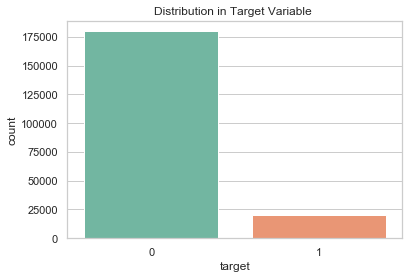

In [15]:
#checking the data distribution in target column
sns.set(style='whitegrid')
sns.countplot(train_df['target'], palette='Set2')
plt.title("Distribution in Target Variable ")

In [16]:
print('There are {}% 1\'s in target variable'.format(100 * train_df['target'].value_counts()[1]/train_df.shape[0]))
print('& {}% 0\'s in target variable'.format(100 * train_df['target'].value_counts()[0]/train_df.shape[0]))

There are 10.049% 1's in target variable
& 89.951% 0's in target variable


It is clear this is a unbalanced data set. we have to resample it in the later stage.

In [17]:
#defining a function for visualizing data distribution in variables
def plot_distribution(df, columns):
    sns.set()
    fig, ax= plt.subplots(10,10,figsize=(20,24))
    i = 0
    for col in columns:
        i += 1
        plt.subplot(10,10,i)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize=9)
        plt.tick_params(axis='x', labelsize=6, pad=-7)
    plt.show()
    

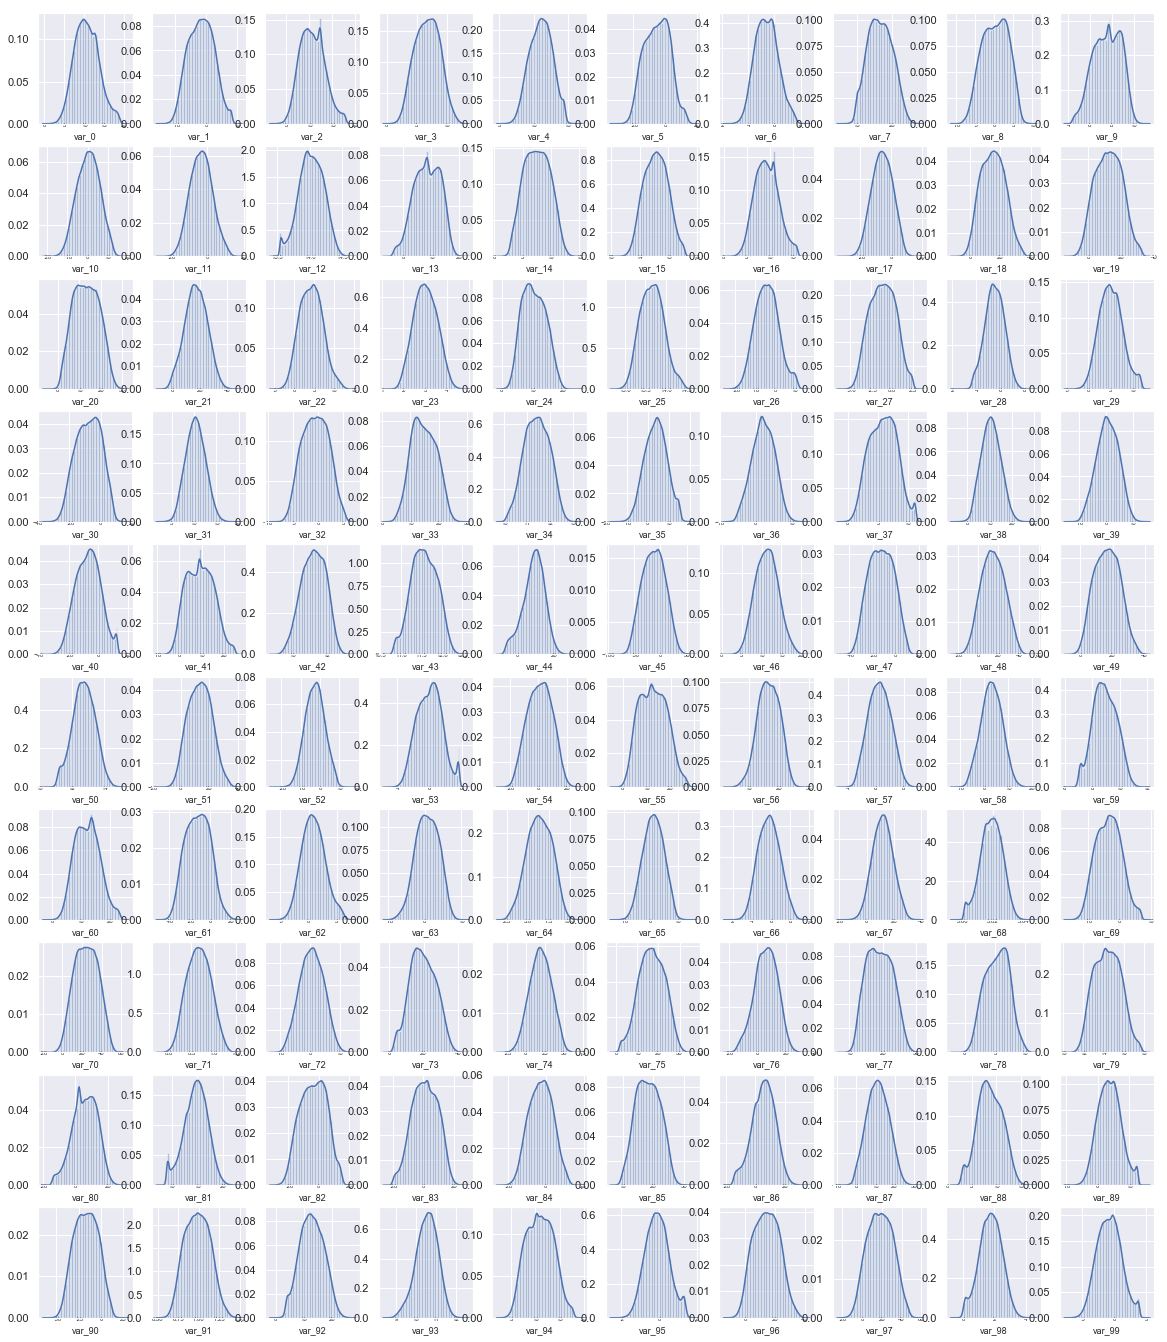

In [18]:
#setting columns and viewing data
columns =train_df.columns.values[2:102] 
plot_distribution(train_df,columns)

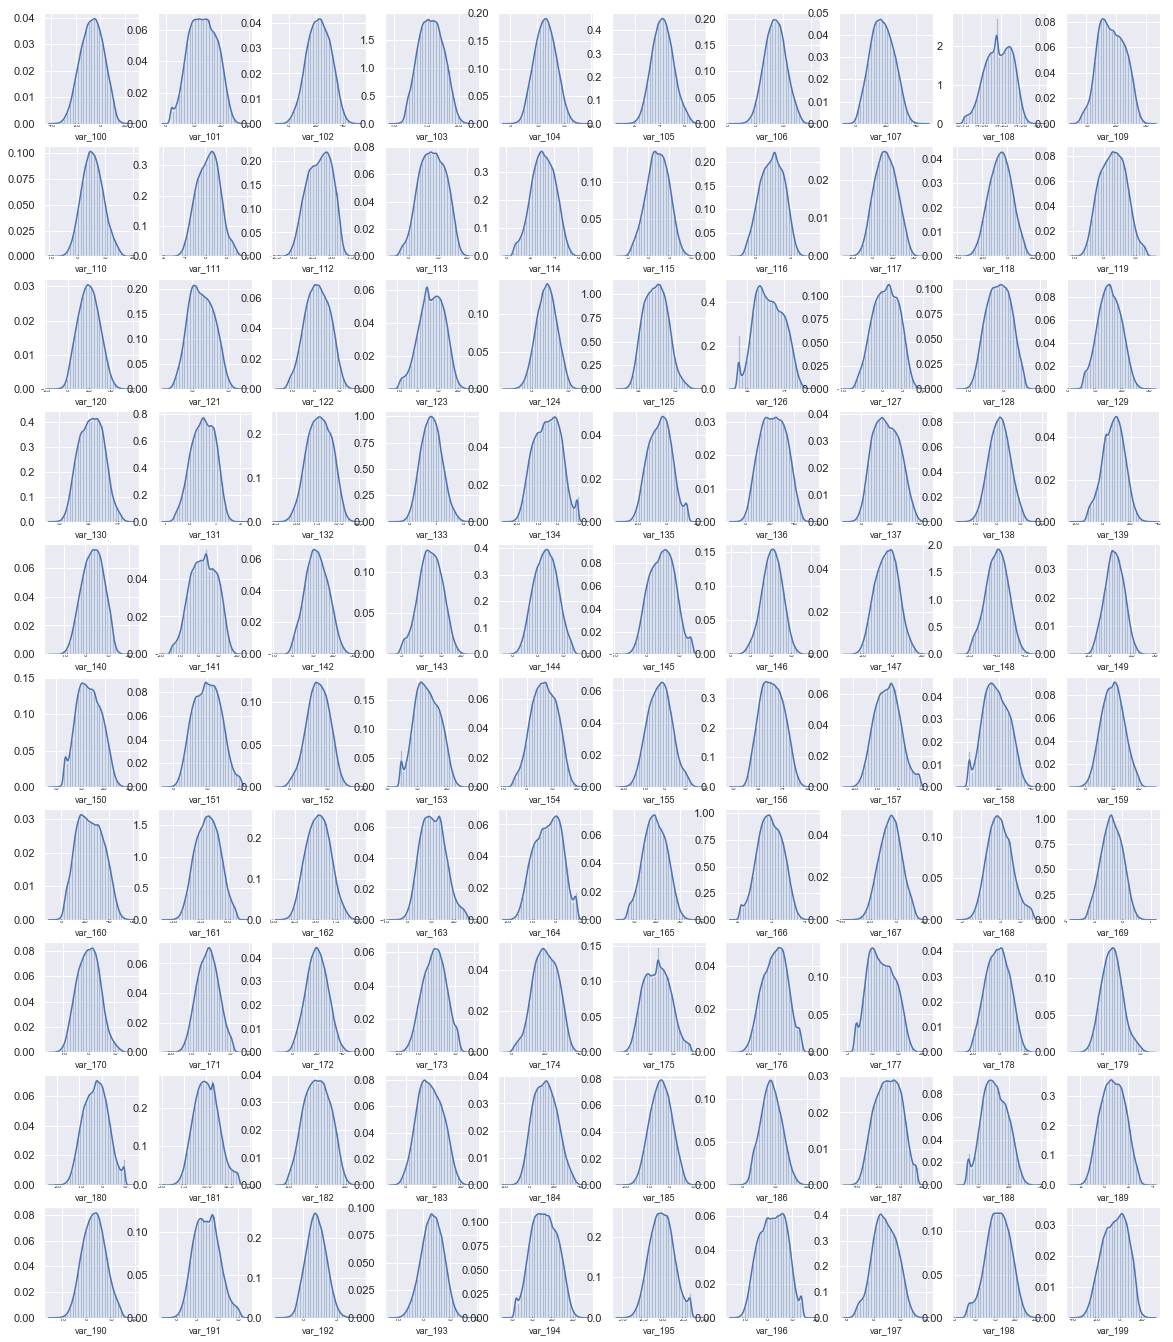

In [19]:
#viewing data for remaining columns
columns=train_df.columns.values[102:]
plot_distribution(train_df,columns)

From the same function we can view the distribution of test set as well. from the above plots we can see that the data is well distributed though there were some exceptions here and there.

## Outlier Analysis

In [20]:
def feature_boxplot(df, columns):
    sns.set(style='whitegrid')
    fig, ax = plt.subplots(10,10,figsize=(18,24))
    plt.title("Outliers")
    i=0
    for col in columns:
        i += 1
        plt.subplot(10,10,i)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize=9)
        plt.tick_params(axis='x', labelsize=7, pad= -7)
    plt.show()

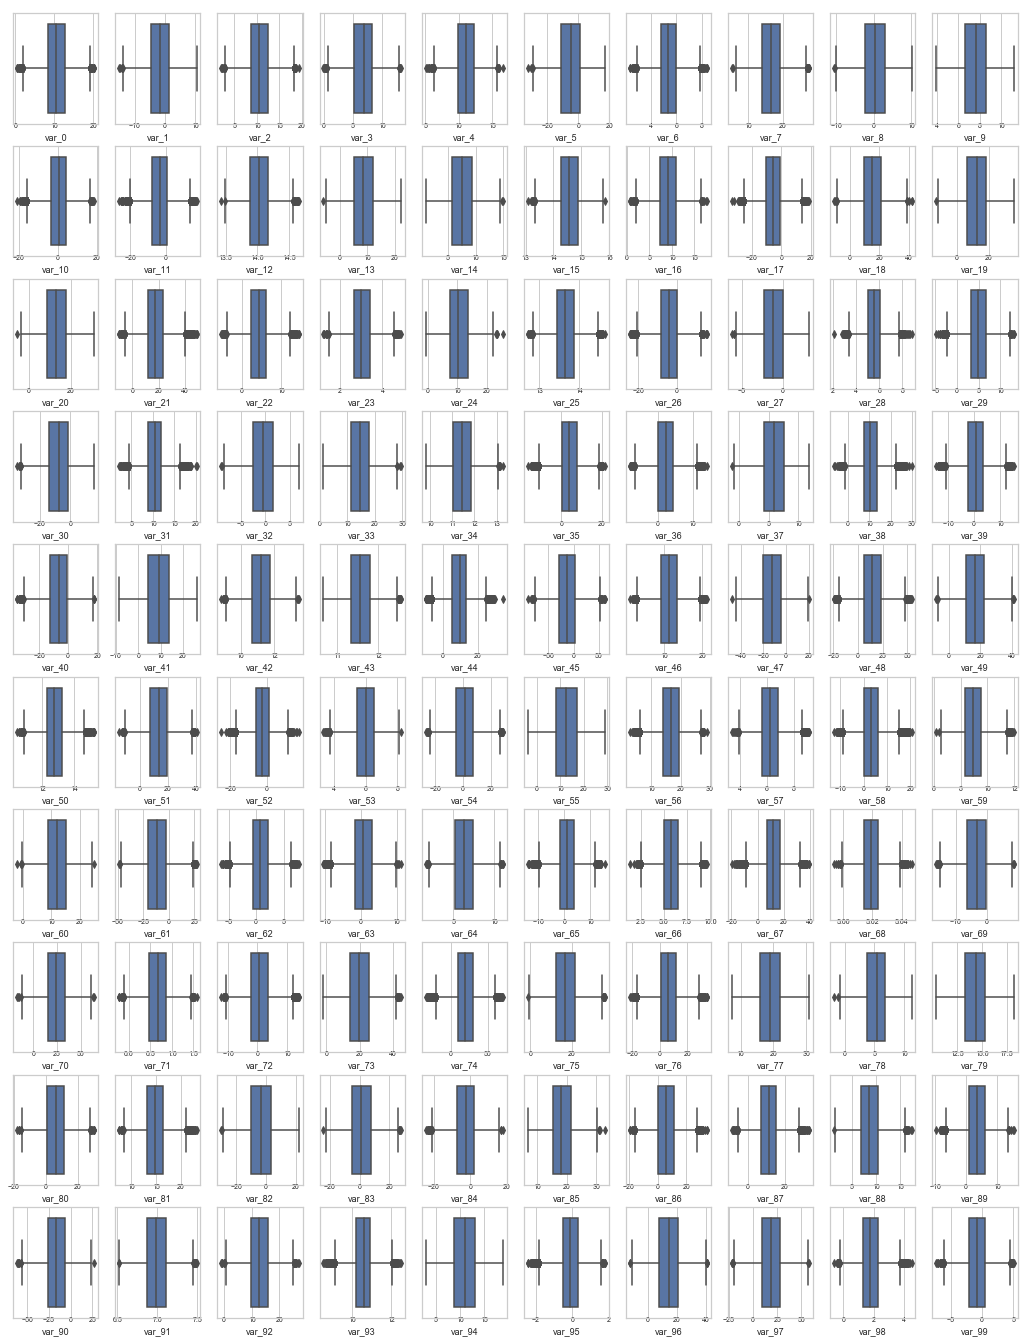

In [21]:
columns=train_df.columns.values[2:102]
feature_boxplot(train_df,columns)

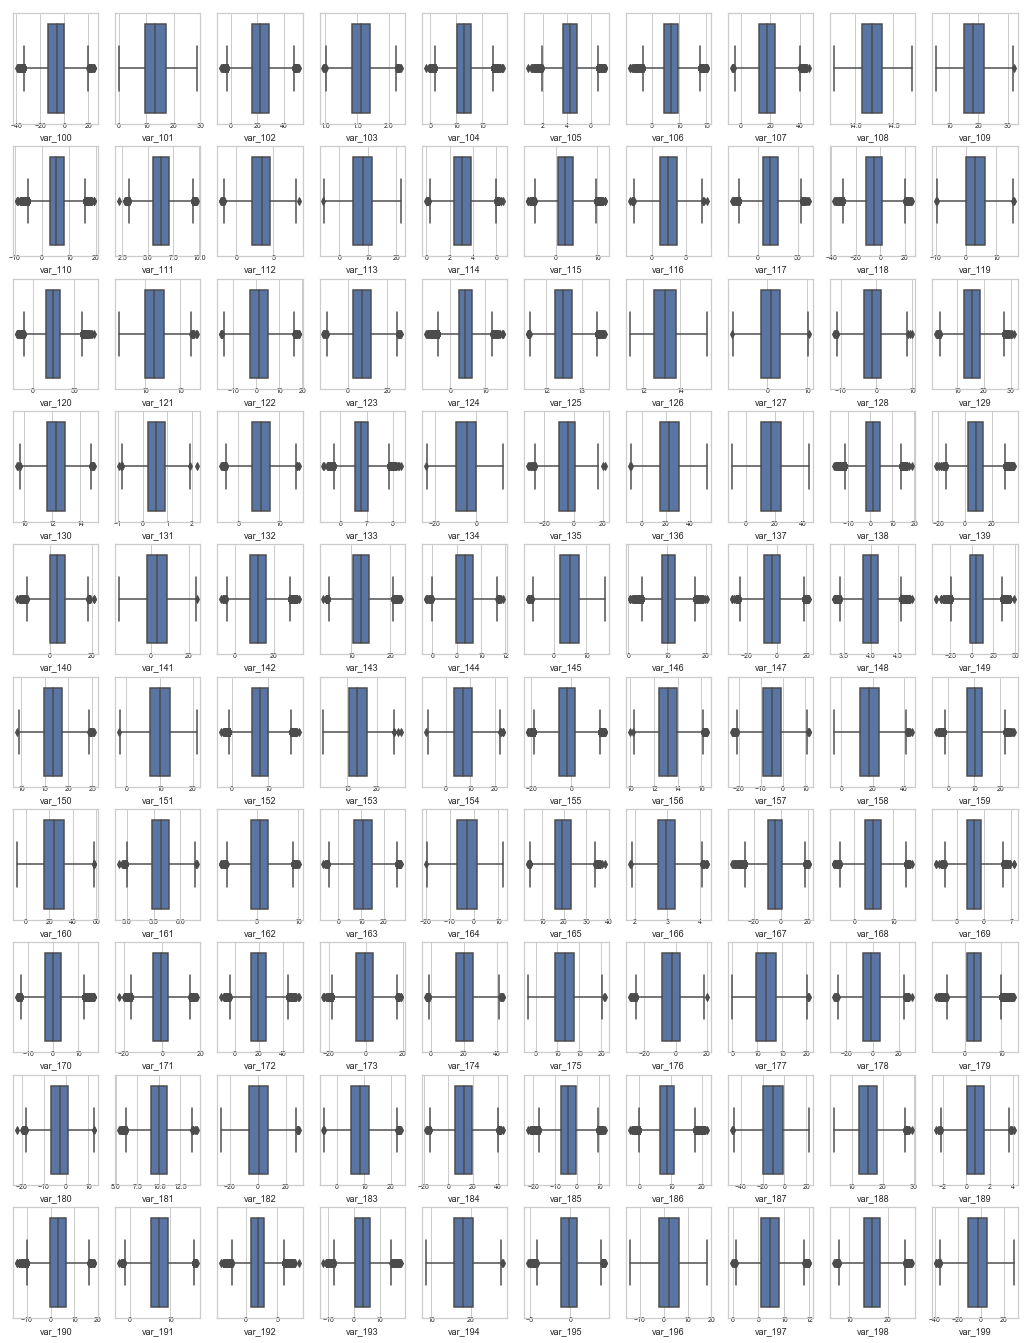

In [22]:
columns=train_df.columns.values[102:]
feature_boxplot(train_df,columns)

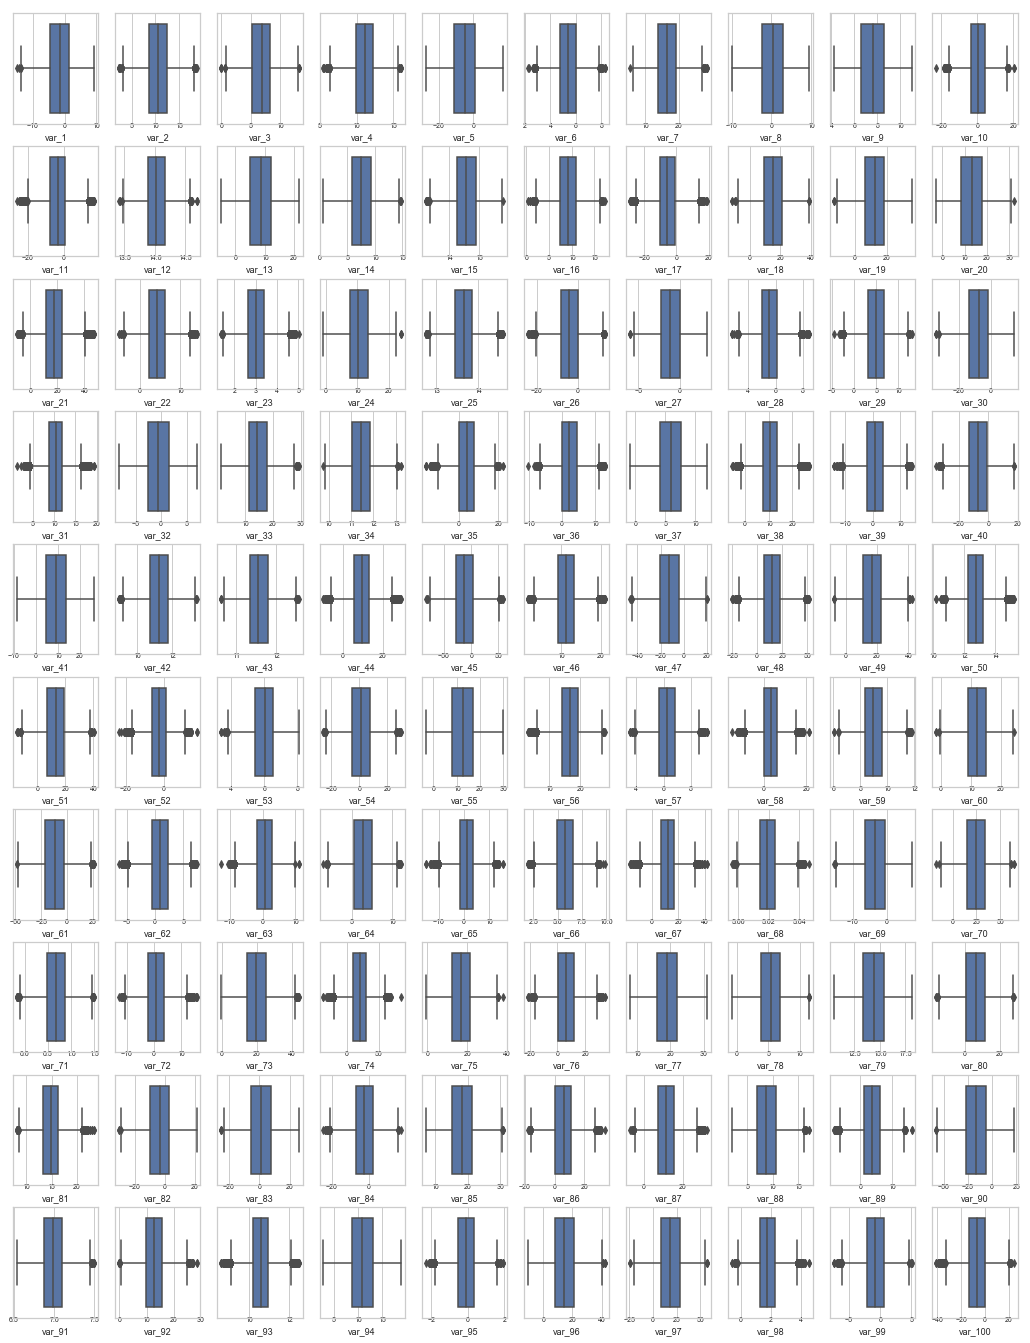

In [23]:
#checking for outliers in test data set
columns = test_df.columns.values[2:102]
feature_boxplot(test_df,columns)

We the box plots we can see that almost all the variables have outliers so we have to get rid of them.

In [24]:
#creating columns list
cnames = train_df.drop(['target','ID_code'],axis=1).columns
cnames

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=200)

In [25]:
#copying df
df_train =train_df.copy()
df_test = test_df.copy()

In [26]:
#detecting and deleting outliers from the  train data
for i in cnames:
    q75, q25 =np.percentile(train_df.loc[:,i],[75,25])
    iqr  = q75-q25
    min  = q25 - (iqr*1.5)
    max  = q75 + (iqr*1.5)
    train_df = train_df.drop(train_df[train_df.loc[:,i]<min].index) 
    train_df = train_df.drop(train_df[train_df.loc[:,i]>max].index) 

In [8]:
#checking the number of observations dropped
print("Total number of observations dropped in train set:",df_train.shape[0]-train_df.shape[0])
train_df.shape

Total number of observations dropped in train set: 24927


(175073, 202)

In [27]:
#detecting and deleting outliers from the  test data
for i in cnames:
    q75, q25 =np.percentile(test_df.loc[:,i],[75,25])
    iqr  = q75-q25
    min  = q25 - (iqr*1.5)
    max  = q75 + (iqr*1.5)
    test_df = test_df.drop(test_df[test_df.loc[:,i]<min].index) 
    test_df = test_df.drop(test_df[test_df.loc[:,i]>max].index) 

In [10]:
#checking the number of observations dropped
print("Total number of observations dropped in test set:",df_test.shape[0]-test_df.shape[0])
test_df.shape

Total number of observations dropped in test set: 25426


(174574, 201)

## Feature Selection

Now lets check the correlation between the features in train set

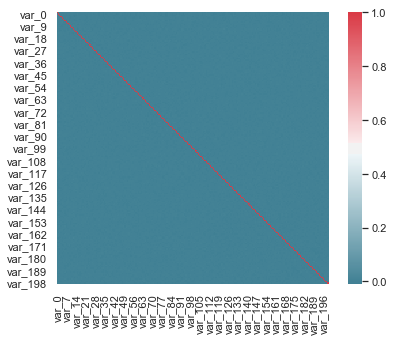

In [28]:
df_corr= train_df.loc[:,cnames]
f,ax= plt.subplots(figsize=(7,5))
corr= df_corr.corr()
sns.heatmap(corr,mask= np.zeros_like(corr,dtype= np.bool),cmap= sns.diverging_palette(220,10,as_cmap= True),square= True,ax=ax)

From the color of the graph we can see that there isn't much correlation between the variables. So, we have to keep all the 200 columns. 

In [29]:
#copying data
data_Train =train_df.copy()
data_Test  =test_df.copy()

## Feature Scaling

While observing the distributions there were slight variations here and there and even in description of the dataset standard deviation of the variables is high.
So, before going for modelling lets normalize the data.

In [30]:
#Normalization of train set
for i in cnames:
    train_df[i]=(train_df[i]-train_df[i].min())/(train_df[i].max()-train_df[i].min())

In [31]:
train_df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,0.402177,0.292074,0.584832,0.360750,0.541944,0.428616,0.445950,0.599229,...,0.549167,0.306125,0.647331,0.424194,0.521838,0.221894,0.678981,0.432931,0.312817,0.535268
2,train_2,0,0.383803,0.458737,0.596195,0.589273,0.449393,0.432917,0.815398,0.401589,...,0.489941,0.641196,0.469241,0.423963,0.685452,0.916032,0.236337,0.377654,0.427523,0.558635
3,train_3,0,0.526233,0.483233,0.389996,0.532375,0.660389,0.588981,0.592615,0.416839,...,0.550375,0.350931,0.353519,0.412187,0.761405,0.363140,0.346810,0.755756,0.619349,0.411073
4,train_4,0,0.455137,0.510803,0.648538,0.486814,0.627993,0.681244,0.612404,0.630015,...,0.319733,0.625720,0.248002,0.758362,0.243878,0.332878,0.557507,0.608396,0.620985,0.414044
5,train_5,0,0.550401,0.476370,0.630965,0.649151,0.489398,0.705195,0.327156,0.431645,...,0.133260,0.457854,0.909096,0.368492,0.331889,0.651596,0.325396,0.657678,0.301038,0.477651


In [32]:
#Normalization of test set
for i in cnames:
    test_df[i]=(test_df[i]-test_df[i].min())/(test_df[i].max()-test_df[i].min())

In [33]:
test_df.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,0.527685,0.930657,0.654316,0.712253,0.542377,0.563885,0.593815,0.576118,0.616146,...,0.294727,0.756352,0.095457,0.458396,0.240941,0.830252,0.613081,0.835528,0.471268,0.419220
1,test_1,0.380109,0.648781,0.543978,0.365213,0.302293,0.527653,0.628374,0.594179,0.282491,...,0.792452,0.582896,0.381684,0.802901,0.344772,0.581003,0.417179,0.675009,0.690133,0.224878
2,test_2,0.202701,0.147169,0.466087,0.517502,0.416723,0.834554,0.400158,0.674640,0.585037,...,0.349565,0.707099,0.507269,0.446245,0.200311,0.787808,0.228884,0.143552,0.735993,0.189939
3,test_3,0.380517,0.537486,0.591977,0.478818,0.264529,0.687271,0.409229,0.690131,0.679433,...,0.751678,0.596803,0.468350,0.509125,0.323113,0.917782,0.599396,0.553588,0.324320,0.490716
4,test_4,0.564951,0.588867,0.733003,0.574971,0.292208,0.426075,0.798815,0.196026,0.659735,...,0.543412,0.602310,0.423127,0.499993,0.566191,0.485380,0.294091,0.186377,0.378733,0.411849


In [34]:
#copying the normalised data
train_N = train_df.copy()
test_N  = test_df.copy()

In [35]:
#dropping ID_code variable from both train and test sets
train_df=train_df.drop(columns='ID_code',axis=1)
test_df =test_df.drop(columns='ID_code',axis=1)

## Resampling

In [36]:
## Get the YES and the NO from the target 

YES = train_df[train_df['target']==1]

NO  = train_df[train_df['target']==0]

In [37]:
print(YES.shape,NO.shape)

(17103, 201) (157970, 201)


In [38]:
#Separating the dependent and independent variables
y =train_df['target']
X =train_df.drop(['target'],axis=1)

In [39]:
# Random Over sampler to handle the imbalanced dataset
from imblearn.over_sampling import RandomOverSampler

In [40]:
os = RandomOverSampler(ratio=1)

In [41]:
X_res, Y_res = os.fit_sample(X,y)

In [42]:
X_res.shape,Y_res.shape

((315940, 200), (315940,))

Text(0.5, 1.0, 'Distribution in Target Variable ')

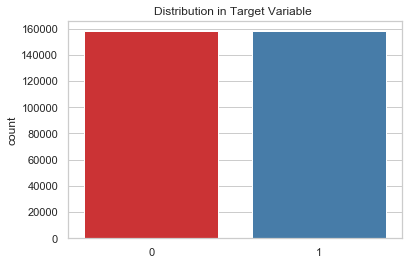

In [43]:
#checking the data distribution in target column
sns.set(style='whitegrid')
sns.countplot(Y_res, palette='Set1')
plt.title("Distribution in Target Variable ")

Now we can see that we have a balanced data set after performing over sampling on target column.

# <a>Modelling</a>

In [44]:
#importing packages 
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix

In [45]:
#dividing data_set into train & test
X_train, X_test, Y_train, Y_test= train_test_split(X_res, Y_res, test_size=0.2, random_state=82)

In [46]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(252752, 200) (63188, 200) (252752,) (63188,)


### Logistic Regression

In [44]:
#fitting the model
logit = sm.Logit(Y_train,X_train).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.465789
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               252752
Model:                          Logit   Df Residuals:                   252552
Method:                           MLE   Df Model:                          199
Date:                Sun, 17 Nov 2019   Pseudo R-squ.:                  0.3280
Time:                        20:05:30   Log-Likelihood:            -1.1773e+05
converged:                       True   LL-Null:                   -1.7519e+05
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8599      0.028     30.705      0.000       0.805       0.915
x2             0.8968      0.030     29.941      0.000       0.838       0.956
x3             0.9780      0.028     34.399      0.000       0.922       1.034
x4             0.1748      0.030      5.753      0.000       0.115       0.234
x5             0.2360      0.030      7.977      0.000       0.178       0.294
x6             0.6606      0.030     22.264      0.000       0.602       0.719
x7             1.2710      0.028     44.823      0.000       1.215       1.327
x8            -0.0830      0.030     -2.740      0.006      -0.142      -0.024
x9             0.3532      0.031     11.493      0.000       0.293       0.413
x10           -0.8239      0.029    -28.220      0.000      -0.881      -0.767
x11            0.0322      0.029      1.093      0.274      -0.026       0.090
x12            0.4289      0.029     15.043      0.000       0.373       0.485
x13           -1.2424      0.028    -44.563      0.000      -1.297      -1.188
x14           -1.0133      0.029    -34.626      0.000      -1.071      -0.956
x15           -0.0773      0.030     -2.548      0.011      -0.137      -0.018
x16            0.2423      0.030      8.132      0.000       0.184       0.301
x17            0.1170      0.028      4.115      0.000       0.061       0.173
x18           -0.0208      0.030     -0.704      0.482      -0.079       0.037
x19            0.7609      0.030     25.242      0.000       0.702       0.820
x20            0.1380      0.030      4.668      0.000       0.080       0.196
x21           -0.4572      0.030    -15.227      0.000      -0.516      -0.398
x22           -1.0628      0.028    -37.725      0.000      -1.118      -1.008
x23            1.0632      0.029     37.098      0.000       1.007       1.119
x24           -0.5681      0.030    -19.187      0.000      -0.626      -0.510
x25            0.6040      0.031     19.701      0.000       0.544       0.664
x26            0.2178      0.029      7.518      0.000       0.161       0.275
x27            1.1208      0.027     40.830      0.000       1.067       1.175
x28           -0.0338      0.030     -1.130      0.258      -0.092       0.025
x29           -0.5256      0.028    -18.516      0.000      -0.581      -0.470
x30            0.1170      0.028      4.154      0.000       0.062       0.172
x31           -0.0127      0.030     -0.419      0.675      -0.072       0.047
x32           -0.5733      0.029    -19.824      0.000      -0.630      -0.517
x33            0.5688      0.030     19.191      0.000       0.511       0.627
x34           -0.9474      0.031    -30.692      0.000      -1.008      -0.887
x35           -0.9972      0.030    -33.111      0.000      -1.056      -0.938
x36            0.6637      0.029     23.158      0.000       0.608       0.720
x37           -0.7404      0.029    -25.572      0.000      -0.797      -0.684
x38            0.1033      0.029      3.585      0.000       0.047       0.160
x3

In [45]:
#predicting the model
logit_predict = logit.predict(X_test)

In [46]:
y_predict=logit_predict.round()

In [50]:
#from the metrics
confusion_matrix(Y_test,y_predict)

array([[24511,  7014],
       [ 6881, 24782]], dtype=int64)

###### Logistic Regression Metrics

In [47]:
#creating confusion matrix
CM =pd.crosstab(Y_test,y_predict)

In [51]:
#let us save TP, TN, FP, FN
TP = CM.iloc[0,0]
FP = CM.iloc[1,0]
TN = CM.iloc[1,1]
FN = CM.iloc[0,1]

In [55]:
#check accuracy of model
accuracy_score = ((TP+TN)/(TP+TN+FP+FN))*100
print('accuracy score : {} %'.format(accuracy_score))

accuracy score : 78.0100652022536 %


In [56]:
#check recall of the model
recall = ((TP)/(TP+FN))*100
print('Recall score: {} %'.format(recall))
specificity = ((TN)/(TN+FP))*100
print('Specificity: {} %'.format(specificity))
false_positive = ((FP)/(FP+TN))*100
print('False +ve: {} %'.format(false_positive))
false_neg = ((FN)/(FN+TP))*100
print('False -ve: {} %'.format(false_neg))

Recall score: 77.75099127676447 %
Specificity: 78.26800998010296 %
False +ve: 21.73199001989704 %
False -ve: 22.249008723235526 %


In [57]:
#importing metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

In [58]:
print("Precision score : {} %".format(precision_score(Y_test,y_predict)*100))
print("Recall score : {} %".format(recall_score(Y_test,y_predict)*100))
print("AUC_score is {}%".format(roc_auc_score(Y_test,y_predict)*100))
print("Accuracy is {}%".format(accuracy_score(Y_test,y_predict)*100))

Precision score : 77.94062146181909 %
Recall score : 78.26800998010296 %
AUC_score is 78.00950062843373%
Accuracy is 78.0100652022536%


## Naive Bayes

In [59]:
from sklearn.naive_bayes import GaussianNB

In [60]:
NB_model = GaussianNB().fit(X_train,Y_train)

In [61]:
NB_pred = NB_model.predict(X_test)

In [62]:
confusion_matrix(Y_test,NB_pred)

array([[25529,  5996],
       [ 6307, 25356]], dtype=int64)

#### Naive Bayes Metrics

In [63]:
#creating confusion matrix
CM =pd.crosstab(Y_test,NB_pred)

In [64]:
#let us save TP, TN, FP, FN
TP = CM.iloc[0,0]
FP = CM.iloc[1,0]
TN = CM.iloc[1,1]
FN = CM.iloc[0,1]

In [65]:
#check recall of the model
recall = ((TP)/(TP+FN))*100
print('Recall score: {} %'.format(recall))
specificity = ((TN)/(TN+FP))*100
print('Specificity: {} %'.format(specificity))
false_positive = ((FP)/(FP+TN))*100
print('False +ve: {} %'.format(false_positive))
false_neg = ((FN)/(FN+TP))*100
print('False -ve: {} %'.format(false_neg))

Recall score: 80.98017446471056 %
Specificity: 80.08085146701197 %
False +ve: 19.91914853298803 %
False -ve: 19.019825535289453 %


In [66]:
print("Precision score : {} %".format(precision_score(Y_test,NB_pred)*100))
print("Recall score : {} %".format(recall_score(Y_test,NB_pred)*100))
print("AUC_score is {}%".format(roc_auc_score(Y_test,NB_pred)*100))
print("Accuracy is {}%".format(accuracy_score(Y_test,NB_pred)*100))

Precision score : 80.87522327124267 %
Recall score : 80.08085146701197 %
AUC_score is 80.53051296586126%
Accuracy is 80.52953092359309%


In [49]:
#converting Numerics to strings 
y=pd.DataFrame(Y_res)
y=y.replace(0,"NO")
y=y.replace(1,'YES')
Y=y.values.ravel()

In [50]:
#dividing data_set into train & test
x_train, x_test, y_train, y_test= train_test_split(X_res, Y, test_size=0.2, random_state=82)

In [51]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(252752, 200) (63188, 200) (252752,) (63188,)


## Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
#fitting the model
RF_model = RandomForestClassifier(n_estimators=10).fit(x_train,y_train)

In [54]:
#predicting
RF_pred = RF_model.predict(x_test)

In [55]:
confusion_matrix(y_test,RF_pred)

array([[31365,   160],
       [   39, 31624]], dtype=int64)

##### Random Forest Metrics

In [56]:
#creating confusion matrix
CM =pd.crosstab(y_test,RF_pred)

In [57]:
#let us save TP, TN, FP, FN
TP = CM.iloc[0,0]
FP = CM.iloc[1,0]
TN = CM.iloc[1,1]
FN = CM.iloc[0,1]

In [58]:
#check recall of the model
recall = ((TP)/(TP+FN))*100
print('Recall score: {} %'.format(recall))
specificity = ((TN)/(TN+FP))*100
print('Specificity: {} %'.format(specificity))
false_positive = ((FP)/(FP+TN))*100
print('False +ve: {} %'.format(false_positive))
false_neg = ((FN)/(FN+TP))*100
print('False -ve: {} %'.format(false_neg))
precision = ((TP)/(TP+FP))*100
print('Precision : {}%'.format(precision))

Recall score: 99.49246629659001 %
Specificity: 99.87682784322395 %
False +ve: 0.12317215677604776 %
False -ve: 0.507533703409992 %
Precision : 99.87581199847153%


In [59]:
print("Accuracy is {}%".format(((TP+TN)/(TN+FN+TP+FP))*100))

Accuracy is 99.68506678483257%


## Desicion Tree

In [145]:
from sklearn import tree

In [155]:
DT_model = tree.DecisionTreeClassifier(criterion='entropy').fit(x_train,y_train)

In [156]:
DT_pred = DT_model.predict(x_test)

In [157]:
confusion_matrix(y_test,RF_pred)

array([[30300,  1225],
       [   42, 31621]], dtype=int64)

#### Desicion Tree Metrics

In [158]:
#creating confusion matrix
CM =pd.crosstab(y_test,RF_pred)

In [159]:
#let us save TP, TN, FP, FN
TP = CM.iloc[0,0]
FP = CM.iloc[1,0]
TN = CM.iloc[1,1]
FN = CM.iloc[0,1]

In [160]:
#check recall of the model
recall = ((TP)/(TP+FN))*100
print('Recall score: {} %'.format(recall))
specificity = ((TN)/(TN+FP))*100
print('Specificity: {} %'.format(specificity))
false_positive = ((FP)/(FP+TN))*100
print('False +ve: {} %'.format(false_positive))
false_neg = ((FN)/(FN+TP))*100
print('False -ve: {} %'.format(false_neg))

Recall score: 99.86735306193349 %
Specificity: 96.11419508326725 %
False +ve: 3.8858049167327517 %
False -ve: 0.13264693806651295 %


In [161]:
print("Accuracy is {}%".format(((TP+TN)/(TN+FN+TP+FP))*100))

Accuracy is 97.99487244413496%


# <a>Predicting on Test data</a>

In [178]:
#Predicting on test data
Predictions = RF_model.predict(test_df)

In [179]:
#adding the predictions to test dataset
test_N['target']=Predictions

In [182]:
test_N.tail(10)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,target
199990,test_199990,0.206130,0.669502,0.436182,0.351048,0.528650,0.261577,0.440481,0.552730,0.349158,...,0.385377,0.440407,0.383926,0.625413,0.595335,0.858443,0.640374,0.303703,0.296946,NO
199991,test_199991,0.395425,0.419024,0.453192,0.652183,0.501241,0.605368,0.551544,0.738136,0.795750,...,0.503452,0.849684,0.738011,0.712156,0.522312,0.425138,0.442496,0.367015,0.215440,NO
199992,test_199992,0.839537,0.377522,0.666689,0.387629,0.725181,0.558539,0.377410,0.399968,0.511373,...,0.326222,0.303893,0.880859,0.383716,0.526809,0.265663,0.760205,0.039505,0.640971,NO
199993,test_199993,0.737872,0.244426,0.263731,0.138509,0.429794,0.351712,0.372012,0.465900,0.530388,...,0.520311,0.607786,0.644636,0.333311,0.467428,0.696225,0.780104,0.592445,0.351232,NO
199994,test_199994,0.366488,0.494734,0.537901,0.688249,0.231029,0.706386,0.563517,0.216135,0.757582,...,0.654267,0.209909,0.694364,0.677811,0.362585,0.605761,0.253566,0.328528,0.487744,NO
199995,test_199995,0.650055,0.638383,0.485666,0.497203,0.237850,0.524268,0.392630,0.402260,0.368580,...,0.631804,0.832476,0.287126,0.194232,0.671703,0.312229,0.539837,0.635128,0.634866,NO
199996,test_199996,0.449188,0.199519,0.278961,0.688773,0.699286,0.683821,0.561244,0.606808,0.766888,...,0.457456,0.487876,0.456583,0.529981,0.404239,0.567345,0.531211,0.632961,0.228162,NO
199997,test_199997,0.560888,0.692953,0.537467,0.576140,0.676301,0.868254,0.500264,0.581669,0.592019,...,0.227013,0.569265,0.345564,0.594397,0.374111,0.327870,0.546741,0.250931,0.204261,NO
199998,test_199998,0.673730,0.572423,0.701479,0.553290,0.519972,0.365683,0.258290,0.504715,0.778575,...,0.563695,0.542409,0.606983,0.424323,0.668571,0.387348,0.341429,0.070374,0.554120,NO
199999,test_199999,0.492805,0.672655,0.471908,0.437149,0.391268,0.640725,0.398717,0.388703,0.477323,...,0.608668,0.432377,0.568231,0.596161,0.357750,0.379914,0.763232,0.403150,0.435240,NO


In [184]:
#saving the data in csv
test_N.to_csv("E:\\Data Science\\EDWISOR\\Santander CT\\test_pred.csv")

## Deployment

In [60]:
import pickle
import json
import requests

In [61]:
pickle.dump(RF_model, open('model.pkl','wb'))

In [62]:
model = pickle.load(open('model.pkl','rb'))

In [ ]:
from flask import Flask, request, jsonify
import pickle

app = Flask(__name__)

# Load the model
model = pickle.load(open('model.pkl','rb'))

@app.route('/api',methods=['POST'])
def predict():
    # Get the data from the POST request.
    data = request.get_json(force=True)

    # Make prediction using model loaded from disk as per the data.
    prediction = model.predict([[np.array(data['var_0'])]])

    # Take the first value of prediction
    output = prediction[0]

    return jsonify(output)

if __name__ == '__main__':
    app.run(debug=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


In [ ]:
import requests

url = 'http://localhost:8888/api'

r = requests.post(url,json={'var_0':0.133981,})
print(r.json())